In [1]:
"""
Created on Wed Oct 25 11:53:08 2023

@author: Carlson and O'Connor
"""

"\nCreated on Wed Oct 25 11:53:08 2023\n\n@author: Carlson and O'Connor\n"

-*- coding: utf-8 -*-

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
 
# Plot the directed graph
def plot_directed_graph(G):
    pos = nx.spring_layout(G, k=3)
    nx.draw_networkx(G, pos=pos, with_labels=True)
    plt.show()
 


In [4]:
 
# Set up the parameters for the cascade model
N = 10  # Number of nodes
p = 0.5  # Probability of edge creation
 


In [5]:
# Create the undirected graph using the Erdos-Renyi model
#this will make it directed such that every node has bidirectional connection w its neighbors
#we want unidirectional connections, such that j < i 
#so we will remove nodes where j>i
G = nx.erdos_renyi_graph(N, p, directed=True)


In [6]:
dic= {}

for i in range(N+1):
    dic[i]=i+1

In [7]:
nx.relabel_nodes(G, dic, copy=False)

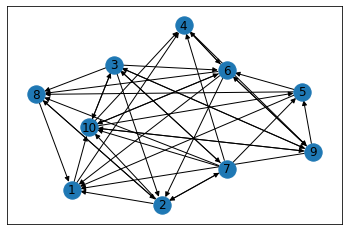

In [8]:
#see our initial graph
plot_directed_graph(G)

In [9]:
#our initial graph edges, we have some bidirectional connections but we only want unidirectional
G.edges()

OutEdgeView([(10, 9), (10, 6), (10, 5), (10, 4), (10, 3), (9, 10), (9, 6), (9, 5), (9, 3), (9, 1), (8, 2), (8, 1), (7, 10), (7, 8), (7, 5), (7, 4), (7, 3), (7, 2), (6, 10), (6, 9), (6, 8), (6, 4), (6, 2), (6, 1), (5, 8), (5, 6), (5, 1), (4, 9), (4, 6), (3, 10), (3, 9), (3, 8), (3, 7), (3, 6), (3, 2), (2, 10), (2, 8), (2, 7), (2, 1), (1, 10), (1, 4)])

In [10]:
#remove edges that go from a lower num node to a higher num node
#so now we should only have edges running from higher num node to lower
#and all edges should be unidirectional
G.remove_edges_from([(i, j) for i in range(N+1) for j in range(N+1) if i < j])

In [11]:
#check
G.edges()

OutEdgeView([(10, 9), (10, 6), (10, 5), (10, 4), (10, 3), (9, 6), (9, 5), (9, 3), (9, 1), (8, 2), (8, 1), (7, 5), (7, 4), (7, 3), (7, 2), (6, 4), (6, 2), (6, 1), (5, 1), (3, 2), (2, 1)])

In [12]:
no_cycle= []
adds_cycle= []

G1= G.copy()



In [13]:
for i in G.edges():
    
    G1.remove_edges_from([(i[0], i[1])])
    G1.add_edges_from([(i[1], i[0])])
    
    if nx.is_directed_acyclic_graph(G1):
        no_cycle.append(i)
    else:
        adds_cycle.append(i)
    
    
    G1.remove_edges_from([(i[1], i[0])])
    G1.add_edges_from([(i[0], i[1])])

In [14]:
no_cycle

[(10, 9),
 (9, 6),
 (9, 5),
 (9, 3),
 (8, 2),
 (7, 5),
 (7, 4),
 (7, 3),
 (6, 4),
 (6, 2),
 (5, 1),
 (3, 2),
 (2, 1)]

In [15]:
adds_cycle

[(10, 6), (10, 5), (10, 4), (10, 3), (9, 1), (8, 1), (7, 2), (6, 1)]

In [16]:
# Test if the graph is acyclic again
if nx.is_directed_acyclic_graph(G):
    print("The graph is acyclic.")
else:
    print("The graph contains at least one cycle.")

The graph is acyclic.


In [17]:
#additional check, this would show all cycles if they exist
list(nx.simple_cycles(G))

[]

In [18]:
#Calculate the average in-degree and out-degree of the graph
avg_in_degree = nx.average_degree_connectivity(G, source='in')
avg_out_degree = nx.average_degree_connectivity(G, source='out')
 
print("The average in-degree of the graph is:", avg_in_degree)
print("The average out-degree of the graph is:", avg_out_degree)
 


The average in-degree of the graph is: {0: 0, 1: 5.0, 2: 5.0, 3: 4.666666666666667, 4: 3.75, 5: 4.2}
The average out-degree of the graph is: {5: 4.2, 4: 4.25, 2: 5.0, 3: 4.333333333333333, 1: 5.0, 0: 0}


In [19]:
avg_in_degree = nx.average_neighbor_degree(G, source='in', target='in')
avg_out_degree = nx.average_neighbor_degree(G, source='out', target='out')
 
print("The average in-degree of the graph is:", avg_in_degree)
print("The average out-degree of the graph is:", avg_out_degree)



The average in-degree of the graph is: {10: 0.0, 9: 13.0, 8: 0.0, 7: 0.0, 6: 6.0, 5: 1.6666666666666667, 4: 0.0, 3: 1.3333333333333333, 2: 1.25, 1: 0.0}
The average out-degree of the graph is: {10: 1.8, 9: 1.25, 8: 0.5, 7: 0.75, 6: 0.3333333333333333, 5: 0.0, 4: 0.0, 3: 1.0, 2: 0.0, 1: 0.0}


In [20]:
in_= G.in_degree()

sum_of_edges = 0
ins= []

for i in range(1, len(in_)+1):
    sum_of_edges += in_[i]
    ins.append(in_[i])

In [21]:
out_= G.out_degree()

sum_of_edges = 0
outs= []

for i in range(1, len(out_)+1):
    sum_of_edges += out_[i]
    outs.append(out_[i])

In [22]:
sum_of_edges/N

2.1

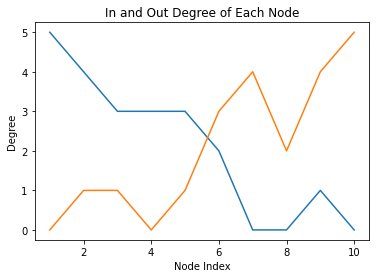

In [23]:
plt.plot(range(1, N+1), ins, label= "In degree")
plt.plot(range(1, N+1), outs, label= 'Out degree')
plt.title('In and Out Degree of Each Node')
plt.xlabel('Node Index')
plt.ylabel('Degree')
plt.savefig('MOCS_Q3_Q1_B')

In [24]:
# Calculate the expected number of edges that run from all nodes in the graph
expected_edges = 0
for i in range(1, N+1):
    ni = G.degree(i)
    expected_edges += (ni * (N - ni - 1)) / 2
print("The expected number of edges that run from all nodes in the graph is:", expected_edges)
 


The expected number of edges that run from all nodes in the graph is: 96.0


In [25]:
total = 0
for i in range(1, N+1):
    
    expected_edges = 0
    expected_edges += (N*i - i**2)*p
    total = total + expected_edges
    print(i , ':', expected_edges)

print ("Total", total)




1 : 4.5
2 : 8.0
3 : 10.5
4 : 12.0
5 : 12.5
6 : 12.0
7 : 10.5
8 : 8.0
9 : 4.5
10 : 0.0
Total 82.5


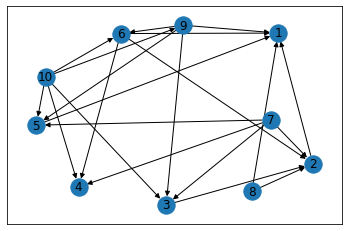

In [26]:
plot_directed_graph(G)

In [27]:
G.edges()

OutEdgeView([(10, 9), (10, 6), (10, 5), (10, 4), (10, 3), (9, 6), (9, 5), (9, 3), (9, 1), (8, 2), (8, 1), (7, 5), (7, 4), (7, 3), (7, 2), (6, 4), (6, 2), (6, 1), (5, 1), (3, 2), (2, 1)])

In [28]:
r

NameError: name 'r' is not defined